In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [62]:
df = pd.read_csv("defaults.csv")

In [64]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [66]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [68]:
df['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

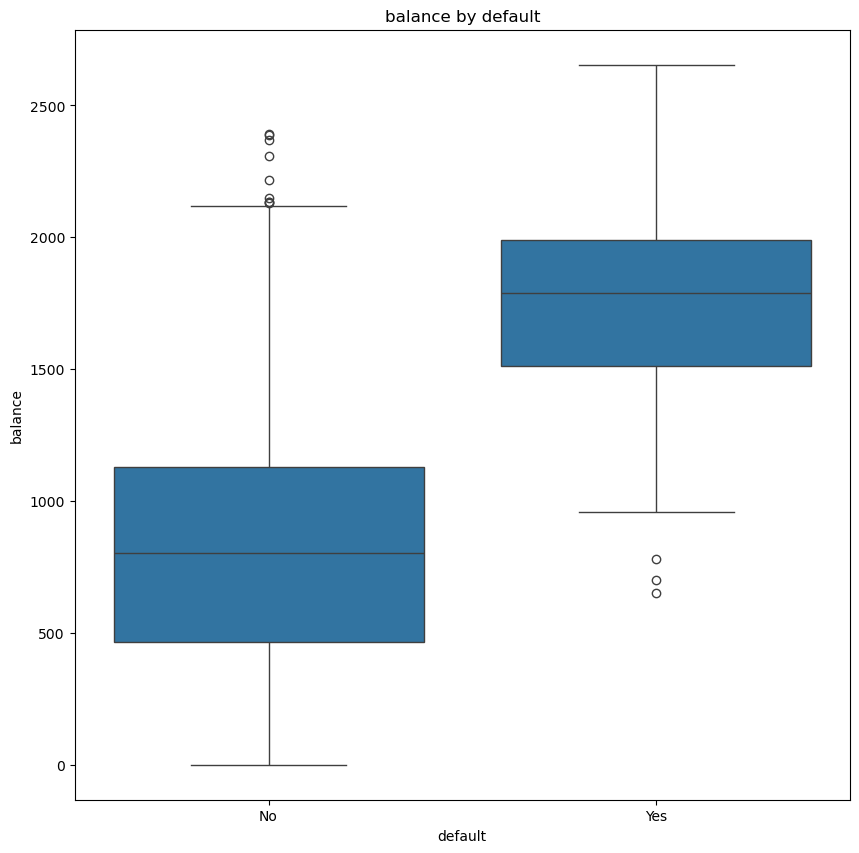

In [128]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='default', y='balance', order=["No", "Yes"], data=df)
plt.title('balance by default')
plt.show()

In [130]:
X = df[['balance']]
X = sm.add_constant(X)
Y = df['default'].map({'Yes': 1, 'No': 0})
logit_model = sm.Logit(y, X)
df_log = logit_model.fit()
df_log.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Mar 2025   Pseudo R-squ.:                  0.4534
Time:                        20:38:48   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [84]:
# (e^-10.6513+0.0055x)/1-(e^-10.6513+0.0055x)


In [86]:
df['Probability_Default'] = df_log.predict(X)
df['Account_Default'] = np.where(df['Probability_Default'] > 0.5, 'Yes', 'No')
df.head()

,default,student,balance,income,Probability_Default,Account_Default
0,No,No,729.526495,44361.62507,0.001306,No
1,No,Yes,817.180407,12106.13470,0.002113,No
2,No,No,1073.549164,31767.13895,0.008595,No
3,No,No,529.250605,35704.49394,0.000434,No
4,No,No,785.655883,38463.49588,0.001777,No


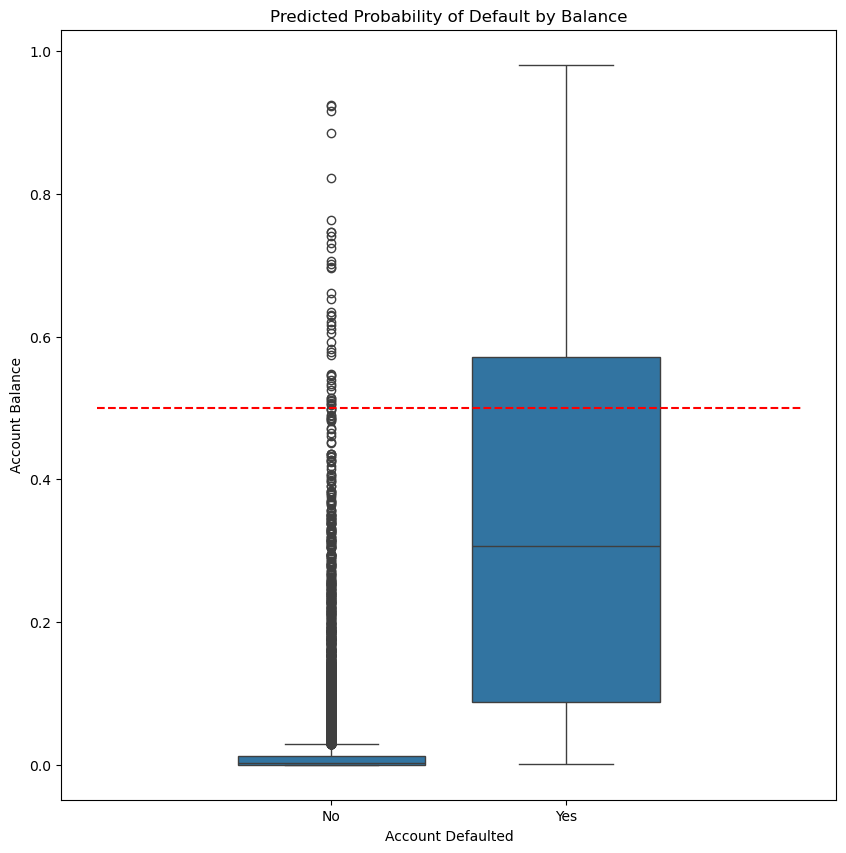

In [124]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='default', y='Probability_Default', order=["No", "Yes"], data=df)
plt.title('Predicted Probability of Default by Balance')
plt.xlabel('Account Defaulted')
plt.ylabel('Account Balance')
plt.hlines(.5, xmin=-1, xmax=2, colors="red", ls='--')
plt.show()

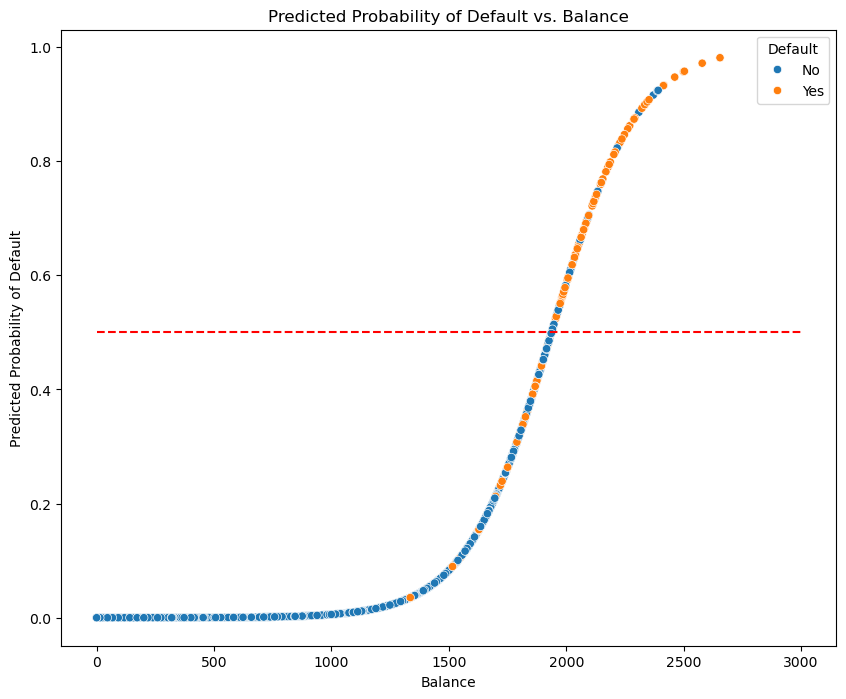

In [136]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='balance', y='Probability_Default', hue='default', data=df)
plt.hlines(0.5, xmin=0, xmax=3000, colors="red", ls='--')
plt.title('Predicted Probability of Default vs. Balance')
plt.xlabel('Balance')
plt.legend(title="Default")
plt.ylabel('Predicted Probability of Default')
plt.show()

In [152]:
new_data = pd.DataFrame({'const': 1, 'balance': [1950]})
logit_predictions = df_log.predict(new_data[['const', 'balance']])
print("Logit predicted probabilities: \n", logit_predictions)
b0, b1 = df_log.params.iloc[0], df_log.params.iloc[1] 
manual_probabilities = np.exp(b0 + b1 * np.array([1950])) / (1 + np.exp(b0 + b1 * np.array([1950])))
print('Manually computed probabilities: \n 0   {manual_probabilities[0]:.6f} \1')

Logit predicted probabilities: 
 0    0.517882
dtype: float64
Manually computed probabilities: 
 0   {manual_probabilities[0]:.6f} 


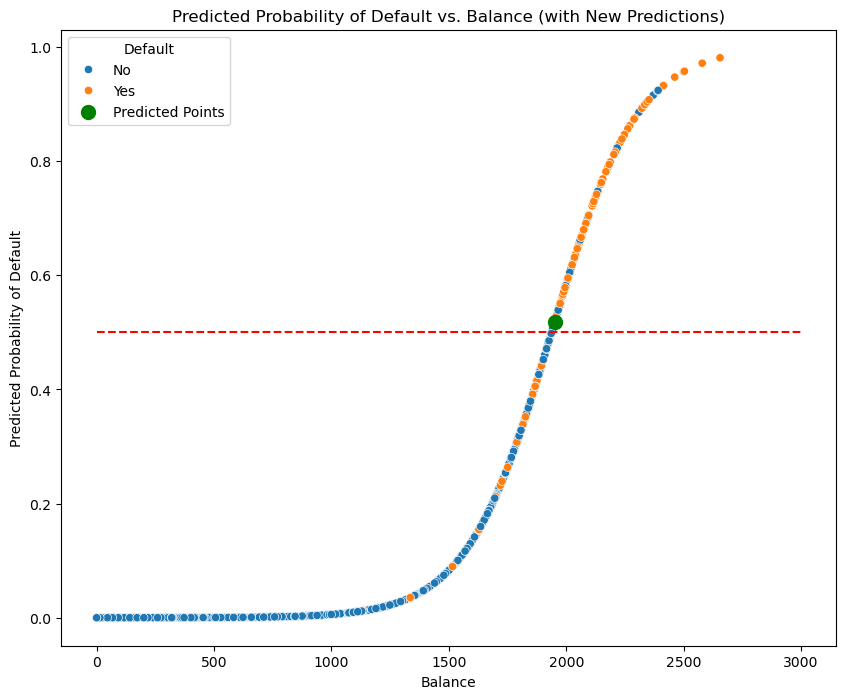

In [160]:
pdf = pd.DataFrame({'balance': [1950], 'Probability_Default': manual_probabilities})

plt.figure(figsize=(10, 8))
sns.scatterplot(x='balance', y='Probability_Default', hue='default', data=df)
plt.hlines(0.5, xmin=0, xmax=3000, colors="red", ls='--')
# Add the new predicted points in orange
plt.scatter(pdf['balance'], pdf['Probability_Default'], color='green', s=100, label='Predicted Points')
plt.title('Predicted Probability of Default vs. Balance (with New Predictions)')
plt.xlabel('Balance')
plt.legend(title="Default")
plt.ylabel('Predicted Probability of Default')
plt.show()

In [ ]:
#corresponding probability is 51.8% on if the account will default with a balance of 1950
